In [30]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [31]:
from problem import Domain, NS_steady_2d
from my_utils import  plot_domain_2d, plot_2d_tri

[[-0.5  1. ]
 [-0.5  1.5]]


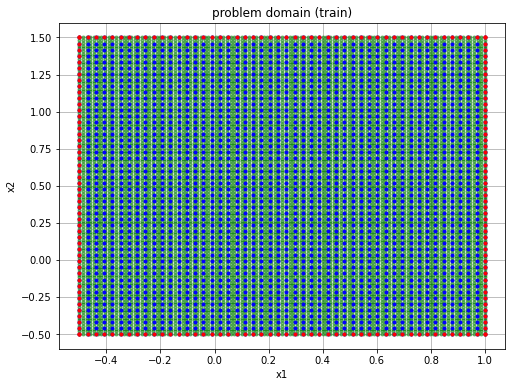

In [32]:
domain = Domain(domain_range=(-0.5, 1, -0.5, 1.5),domain_shape='box')
print(domain.domain_range)
x_pde = domain.sample_domain_uniform(mesh_size=[50,50])
x_test = domain.sample_domain_uniform(mesh_size=[111,111])
x_bd = domain.sample_boundary_uniform(sample_size=200)

plot_domain_2d(x_pde=x_pde,x_bd=x_bd,x_test=x_test)

In [33]:
my_prob = NS_steady_2d()
x,u = my_prob.check_solution(x_pde)
target_pde = my_prob.rhs(x_pde)
target_bd = my_prob.u_exact(x_bd)
target_test = my_prob.u_exact(x_test)

my_prob.set_data(x_pde=x_pde, x_test=x_test, x_bd=x_bd,
                 target_pde=target_pde, target_test=target_test, target_bd=target_bd)
print(my_prob)

div rmse:	 6.815237330848614e-17
pde_u rmse:	 1.1255337781420084e-15
pde_v rmse:	 1.6852282162775636e-16
***************************************************
NS_steady (case=None):
	x_pde:   	(2500, 2)
	x_bd:    	(200, 2)
	x_ic:    	None
	x_test:    	(12321, 2)
***************************************************


In [34]:
np.savez('data/data', x_pde=x_pde, x_bd=x_bd, x_test=x_test,
         target_pde=target_pde, target_bd=target_bd, target_test=target_test)

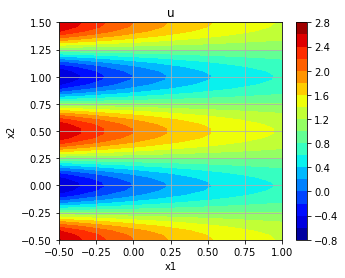

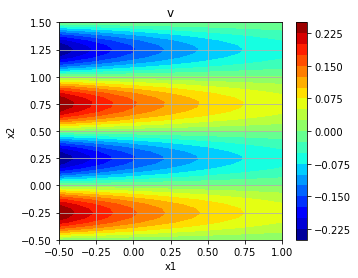

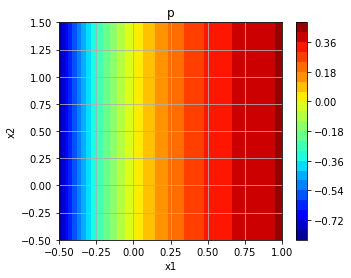

In [35]:
for var in my_prob.out_var:
    plot_2d_tri(x[:,0], x[:,1], u[var][:,0], title=var, equal_ratio=False,figsize=(5,4))